# **Neural Networks: Classification and Regression**
**Application: Classifying Movie Reviews as Positive or Negative**

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# Load the IMDB dataset with a limit of 10,000 most frequent words

The IMDB dataset is a popular benchmark dataset based on movie reviews. It contains a total of 50,000 reviews, half of which are positive and half negative. This data was collected from the IMDB website, and short or neutral comments were removed so that only reviews with clear opinions remain. The purpose of this dataset is to test whether a machine can analyze the words and emotions of a review to determine if it is positive or negative. For this reason, the dataset is widely used for learning and experimenting with deep learning and sentiment analysis.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:

# Print the number of training and testing samples
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

# View first review (as an integer sequence)
print("First training review (as integers):", train_data[0])

# View first label (0 = negative, 1 = positive)
print("First training label:", train_labels[0])


Training samples: 25000
Testing samples: 25000
First training review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15,

In [ ]:
# Retrieve the word index dictionary mapping words to integer IDs
word_index = imdb.get_word_index()

# Reverse the word index to map integer IDs to words
reverse_word_index = {value: key for key, value in word_index.items()}
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Decode and print the first review
print("Decoded Review:", decode_review(train_data[0]))
import numpy as np

# Count occurrences of each label
unique, counts = np.unique(train_labels, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))

Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

Label distribution: {0: 12500, 1: 12500}

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data**

Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]
len(x_train)
len(x_test)


25000

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# **Model 1**
 **Building your model**



x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6982 - loss: 0.6006 - val_accuracy: 0.8646 - val_loss: 0.3964
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8902 - loss: 0.3440 - val_accuracy: 0.8843 - val_loss: 0.3092
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9209 - loss: 0.2462 - val_accuracy: 0.8825 - val_loss: 0.2947
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9353 - loss: 0.2004 - val_accuracy: 0.8877 - val_loss: 0.2767
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9453 - loss: 0.1670 - val_accuracy: 0.8856 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9590 - loss: 0.1376 - val_accuracy: 0.8848 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9656 - loss: 0.11

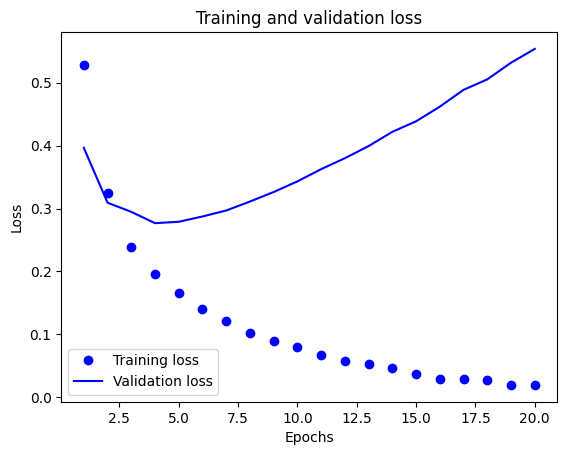

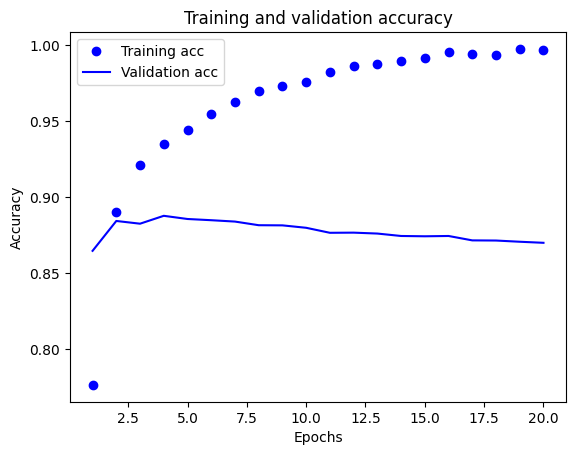

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7484 - loss: 0.5693
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8927 - loss: 0.3108
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9141 - loss: 0.2353
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9277 - loss: 0.1994
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8833 - loss: 0.2894


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# Validating your approach

# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.28730806708335876, 0.8845999836921692]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9388 - loss: 0.1752
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9436 - loss: 0.1567
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9484 - loss: 0.1432
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9553 - loss: 0.1278
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8717 - loss: 0.3494


In [ ]:
results_val

[0.3449626564979553, 0.8738399744033813]

**Using a trained model to generate predictions on new data**


In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1725354 ],
       [0.99998444],
       [0.80152786],
       ...,
       [0.08935391],
       [0.07122459],
       [0.87982374]], dtype=float32)

Test = 88.46%, Val = 87.38% → Stable and a good baseline model.

# **Model 2**
(With Layer 1, 16 units, loss as binary_crossentropy)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7049 - loss: 0.6049 - val_accuracy: 0.8627 - val_loss: 0.4209
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8898 - loss: 0.3729 - val_accuracy: 0.8796 - val_loss: 0.3428
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9134 - loss: 0.2865 - val_accuracy: 0.8848 - val_loss: 0.3066
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9266 - loss: 0.2374 - val_accuracy: 0.8880 - val_loss: 0.2885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9376 - loss: 0.2049 - val_accuracy: 0.8875 - val_loss: 0.2805
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9459 - loss: 0.1813 - val_accuracy: 0.8874 - val_loss: 0.2779
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9524 - loss: 0.1623 - val_accuracy: 0.8859 - val_loss: 0.2783
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9575 - loss: 0.1465 - val_accuracy: 0.8849 - v

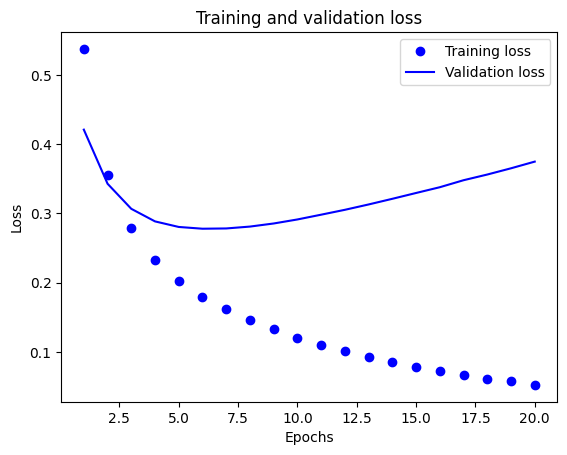

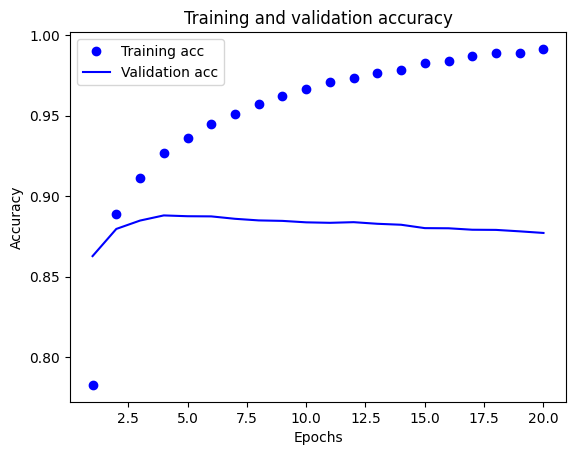

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7516 - loss: 0.5597
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8893 - loss: 0.3309
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9079 - loss: 0.2606
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9215 - loss: 0.2241
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8861 - loss: 0.2816


In [ ]:
# Build model with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


#Compile the model with binary cross-entropy loss
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


#Set aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test


[0.28030717372894287, 0.8876799941062927]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9288 - loss: 0.2006
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9355 - loss: 0.1832
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9414 - loss: 0.1694
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9459 - loss: 0.1577
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8810 - loss: 0.2943


In [ ]:
results_val

[0.29246842861175537, 0.8835200071334839]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.21760589],
       [0.99996084],
       [0.86501616],
       ...,
       [0.10332904],
       [0.06505391],
       [0.69676214]], dtype=float32)

Test = 88.76%, Val = 88.35% → Simple and very strong performance, no signs of overfitting.

# **Model 3**

(With 3 hidden layer and 16 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6398 - loss: 0.6393 - val_accuracy: 0.8623 - val_loss: 0.4203
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8823 - loss: 0.3655 - val_accuracy: 0.8846 - val_loss: 0.3120
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9170 - loss: 0.2494 - val_accuracy: 0.8907 - val_loss: 0.2814
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9344 - loss: 0.1942 - val_accuracy: 0.8913 - val_loss: 0.2778
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9499 - loss: 0.1567 - val_accuracy: 0.8887 - val_loss: 0.2822
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9590 - loss: 0.1298 - val_accuracy: 0.8842 - val_loss: 0.2950
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9657 - loss: 0.1130 - val_accuracy: 0.8850 - val_loss: 0.3113
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9715 - loss: 0.0942 - val_accuracy: 0.8823 - v

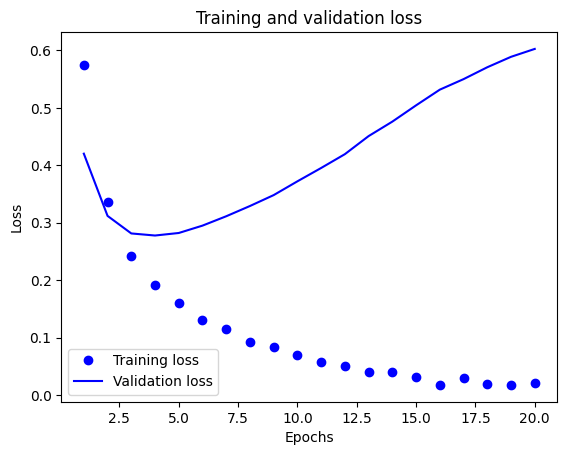

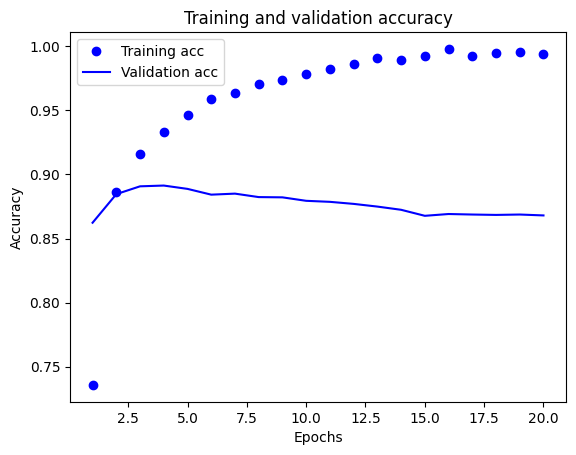

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7280 - loss: 0.5789
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8982 - loss: 0.2965
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9197 - loss: 0.2186
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9313 - loss: 0.1875
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8818 - loss: 0.2947


In [ ]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
#Training the model


#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:

results_test

[0.2927820086479187, 0.8836399912834167]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9382 - loss: 0.1630
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9493 - loss: 0.1378
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9601 - loss: 0.1161
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9600 - loss: 0.1110
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8712 - loss: 0.3685


In [ ]:
results_val

[0.3658800721168518, 0.8731200098991394]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.16247374],
       [0.99994105],
       [0.9081033 ],
       ...,
       [0.06428072],
       [0.0232642 ],
       [0.8321574 ]], dtype=float32)

Test = 88.36%, Val = 87.31% → Adding extra layers didn’t help, slightly weaker.

# **Model 4**
(with 32 units with 2 hidden layers)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.6922 - loss: 0.5892 - val_accuracy: 0.8651 - val_loss: 0.3722
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8912 - loss: 0.3247 - val_accuracy: 0.8856 - val_loss: 0.2981
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9187 - loss: 0.2359 - val_accuracy: 0.8892 - val_loss: 0.2775
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9385 - loss: 0.1872 - val_accuracy: 0.8871 - val_loss: 0.2778
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9519 - loss: 0.1527 - val_accuracy: 0.8865 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9478 - loss: 0.1402 - val_accuracy: 0.8855 - val_loss: 0.2936
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9650 - loss: 0.1116 - val_accuracy: 0.8825 - val_loss: 0.3081
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9695 - loss: 0.0962 - val_accuracy: 0.8798 - 

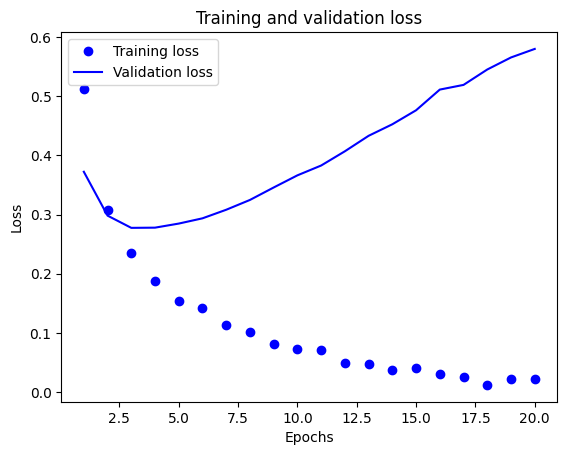

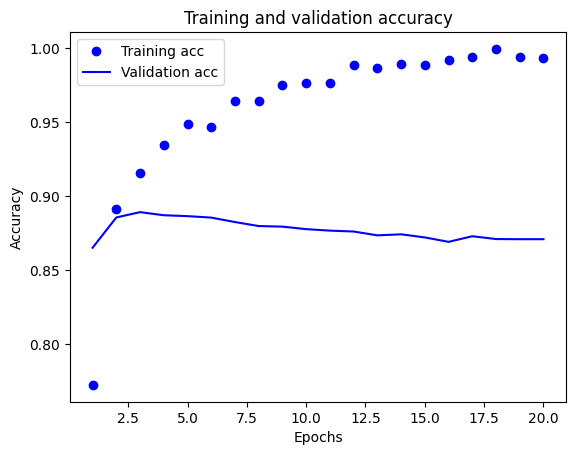

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7370 - loss: 0.5432
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8968 - loss: 0.2811
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9191 - loss: 0.2174
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9255 - loss: 0.1901
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8819 - loss: 0.2984


In [ ]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.2964129149913788, 0.8827599883079529]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9398 - loss: 0.1612
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9402 - loss: 0.1529
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9525 - loss: 0.1278
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9531 - loss: 0.1210
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8704 - loss: 0.3599


In [ ]:

results_val

[0.3592917323112488, 0.8727999925613403]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.09630408],
       [0.99968225],
       [0.4268804 ],
       ...,
       [0.06030433],
       [0.01723764],
       [0.88656586]], dtype=float32)

Test = 88.27%, Val = 87.27% → Increasing units only added complexity, no real gain.

# **Model 5**
With 1 hidden layer, 32 units (tanh and mse)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7108 - loss: 0.1925 - val_accuracy: 0.8673 - val_loss: 0.1144
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8951 - loss: 0.0972 - val_accuracy: 0.8839 - val_loss: 0.0948
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9152 - loss: 0.0756 - val_accuracy: 0.8881 - val_loss: 0.0876
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9273 - loss: 0.0631 - val_accuracy: 0.8817 - val_loss: 0.0884
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9395 - loss: 0.0551 - val_accuracy: 0.8859 - val_loss: 0.0832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9454 - loss: 0.0490 - val_accuracy: 0.8820 - val_loss: 0.0853
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9487 - loss: 0.0455 - val_accuracy: 0.8858 - val_loss: 0.0831
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9546 - loss: 0.0410 - val_accuracy: 0.8844 - v

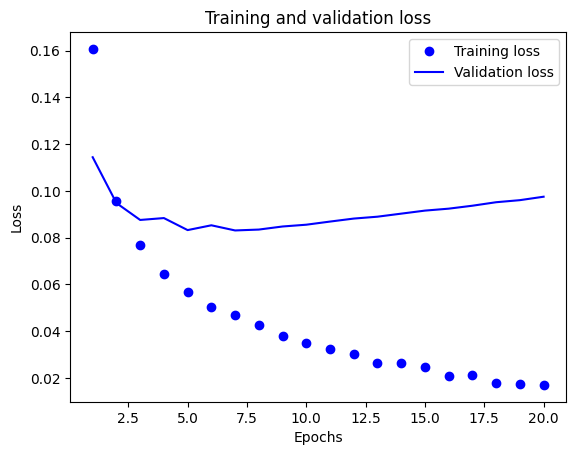

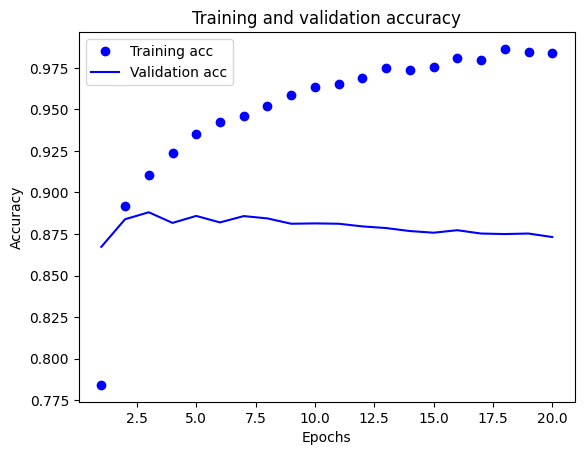

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7383 - loss: 0.1798
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8935 - loss: 0.0891
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9132 - loss: 0.0706
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9220 - loss: 0.0623
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8858 - loss: 0.0845


In [ ]:
# cresate model with 32 units in the hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating your approach

# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo",  label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)



In [ ]:
results_test


[0.08381807804107666, 0.8872799873352051]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9336 - loss: 0.0546
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9368 - loss: 0.0517
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9433 - loss: 0.0474
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9441 - loss: 0.0448
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8766 - loss: 0.0893


In [ ]:
results_val


[0.08833011984825134, 0.8801599740982056]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.08453993],
       [0.99996394],
       [0.8629374 ],
       ...,
       [0.10800033],
       [0.05113023],
       [0.4629633 ]], dtype=float32)

Test = 88.72%, Val = 88.01% → Tanh + MSE surprisingly worked well, very balanced.

# **Model 6**

(With 1 hidden layer, 64 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6778 - loss: 0.5825 - val_accuracy: 0.8689 - val_loss: 0.3605
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.8916 - loss: 0.3179 - val_accuracy: 0.8854 - val_loss: 0.3009
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9168 - loss: 0.2430 - val_accuracy: 0.8793 - val_loss: 0.2994
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9246 - loss: 0.2127 - val_accuracy: 0.8889 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9353 - loss: 0.1836 - val_accuracy: 0.8866 - val_loss: 0.2771
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9505 - loss: 0.1562 - val_accuracy: 0.8852 - val_loss: 0.2807
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9512 - loss: 0.1460 - val_accuracy: 0.8843 - val_loss: 0.2856
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9596 - loss: 0.1269 - val_accuracy: 0.8838 -

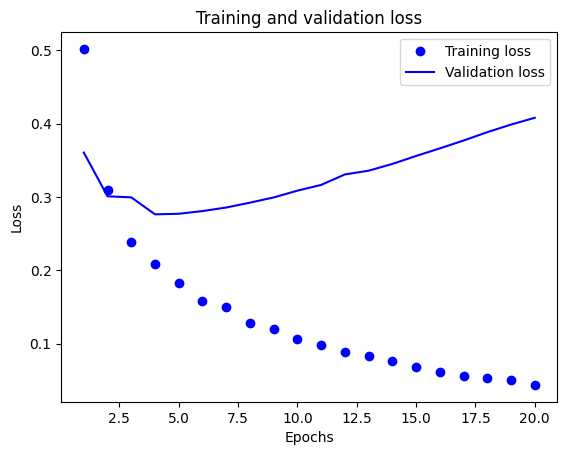

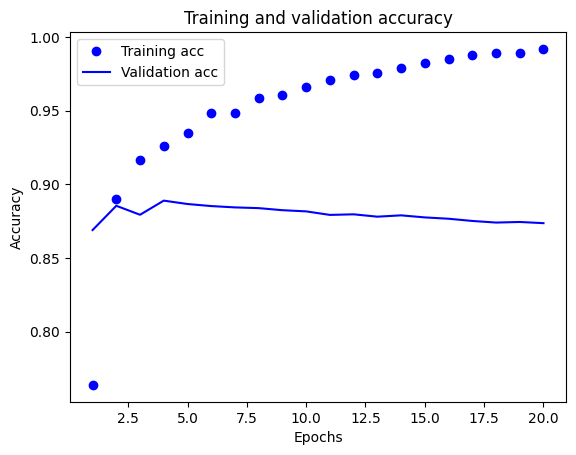

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7366 - loss: 0.5265
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8942 - loss: 0.2798
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9164 - loss: 0.2225
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9289 - loss: 0.1955
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8799 - loss: 0.3024


In [ ]:
# creating the model with 64 units in hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# Validating your approach
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)




In [ ]:
results_test

[0.29839378595352173, 0.8811600208282471]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9347 - loss: 0.1775
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9358 - loss: 0.1682
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9447 - loss: 0.1488
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9467 - loss: 0.1408
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8747 - loss: 0.3221


In [ ]:
results_val


[0.3189661204814911, 0.8780400156974792]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.15836082],
       [0.9999888 ],
       [0.7335095 ],
       ...,
       [0.112912  ],
       [0.04898136],
       [0.79715145]], dtype=float32)

Test = 88.11%, Val = 87.80% → Stable but not better than smaller models.

# **Model 7**
(with 2 hidden layers, 64 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6802 - loss: 0.5887 - val_accuracy: 0.8586 - val_loss: 0.3614
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8808 - loss: 0.3161 - val_accuracy: 0.8773 - val_loss: 0.3069
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9170 - loss: 0.2291 - val_accuracy: 0.8889 - val_loss: 0.2751
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9309 - loss: 0.1869 - val_accuracy: 0.8860 - val_loss: 0.2848
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9504 - loss: 0.1475 - val_accuracy: 0.8853 - val_loss: 0.2858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9545 - loss: 0.1247 - val_accuracy: 0.8852 - val_loss: 0.2986
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9667 - loss: 0.1006 - val_accuracy: 0.8830 - val_loss: 0.3176
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9736 - loss: 0.0818 - val_accuracy: 0.8816 -

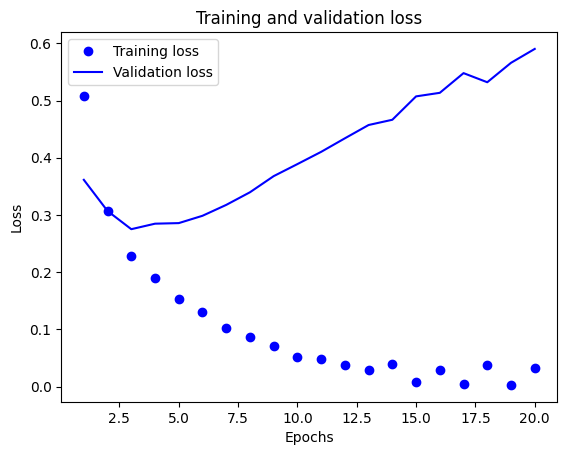

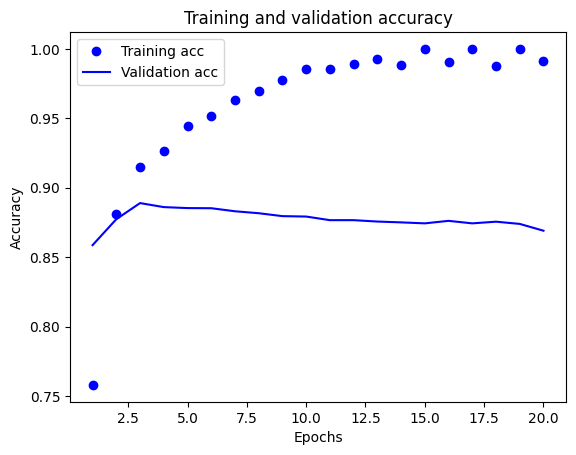

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7249 - loss: 0.5413
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8934 - loss: 0.2760
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9195 - loss: 0.2155
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9304 - loss: 0.1795
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8806 - loss: 0.3011


In [ ]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.29846858978271484, 0.8826000094413757]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9427 - loss: 0.1536
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9419 - loss: 0.1460
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9539 - loss: 0.1185
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9631 - loss: 0.0984
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8588 - loss: 0.4270


In [ ]:
results_val

[0.42942968010902405, 0.8587999939918518]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.06684825],
       [0.999927  ],
       [0.10664738],
       ...,
       [0.02439709],
       [0.00583434],
       [0.7624782 ]], dtype=float32)

Test = 88.26%, Val = 85.87% → Validation dropped → Overfitting detected.

# **Model 8**
(1 hidden layer with 32 units with Tanh activation and Dropuout(0.5), MSE)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6933 - loss: 0.2004 - val_accuracy: 0.8643 - val_loss: 0.1177
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8826 - loss: 0.1049 - val_accuracy: 0.8807 - val_loss: 0.0966
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9124 - loss: 0.0810 - val_accuracy: 0.8768 - val_loss: 0.0942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9161 - loss: 0.0716 - val_accuracy: 0.8848 - val_loss: 0.0859
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9323 - loss: 0.0603 - val_accuracy: 0.8878 - val_loss: 0.0832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9379 - loss: 0.0547 - val_accuracy: 0.8857 - val_loss: 0.0831
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9484 - loss: 0.0481 - val_accuracy: 0.8841 - val_loss: 0.0833
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9523 - loss: 0.0447 - val_accuracy: 0.8835 - v

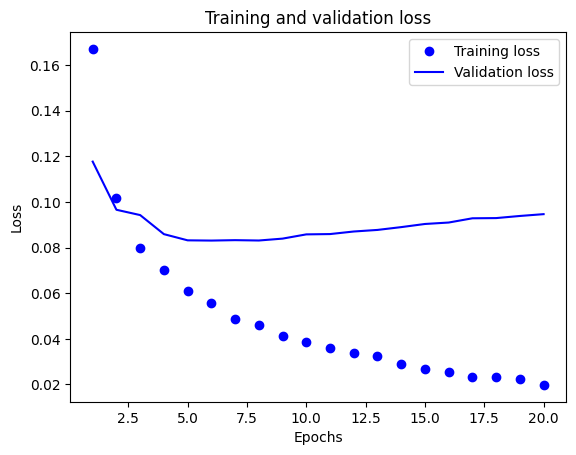

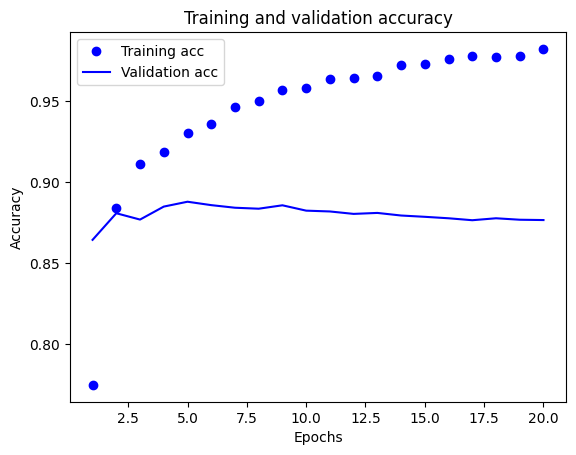

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7331 - loss: 0.1844
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8885 - loss: 0.0943
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9079 - loss: 0.0751
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9199 - loss: 0.0661
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8877 - loss: 0.0844


In [ ]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
     layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.08372218906879425, 0.8885200023651123]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9278 - loss: 0.0591
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9329 - loss: 0.0552
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9392 - loss: 0.0502
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9444 - loss: 0.0476
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8801 - loss: 0.0871


In [ ]:
results_val

[0.08640073239803314, 0.8826799988746643]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.0943015 ],
       [0.9999458 ],
       [0.8116374 ],
       ...,
       [0.1259622 ],
       [0.05306986],
       [0.6309388 ]], dtype=float32)

Test = 88.85%, Val = 88.26% → Dropout improved balance, very good model.

# **Model 9**
(with 2 hidden layers, 16 units and tanh activation)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6883 - loss: 0.2064 - val_accuracy: 0.8602 - val_loss: 0.1235
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8866 - loss: 0.1041 - val_accuracy: 0.8818 - val_loss: 0.0941
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9152 - loss: 0.0729 - val_accuracy: 0.8877 - val_loss: 0.0853
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9267 - loss: 0.0591 - val_accuracy: 0.8859 - val_loss: 0.0831
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9472 - loss: 0.0455 - val_accuracy: 0.8828 - val_loss: 0.0845
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9569 - loss: 0.0384 - val_accuracy: 0.8816 - val_loss: 0.0860
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9623 - loss: 0.0323 - val_accuracy: 0.8800 - val_loss: 0.0903
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9689 - loss: 0.0282 - val_accuracy: 0.8777 - v

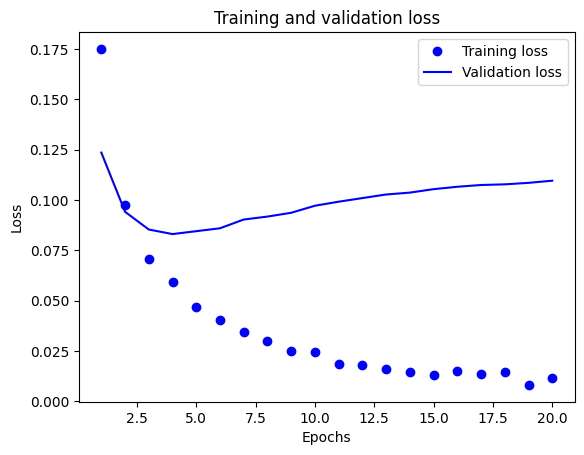

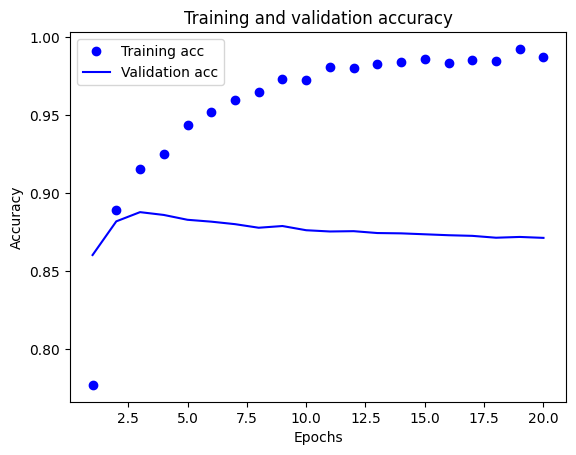

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7534 - loss: 0.1754
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8999 - loss: 0.0808
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9220 - loss: 0.0618
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9357 - loss: 0.0516
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8797 - loss: 0.0876


In [ ]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test


[0.08676691353321075, 0.8822399973869324]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9451 - loss: 0.0446
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9458 - loss: 0.0418
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9524 - loss: 0.0376
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9551 - loss: 0.0363
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8690 - loss: 0.1026


In [ ]:

results_val

[0.10134565085172653, 0.8715199828147888]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.02264812],
       [0.99955297],
       [0.85329694],
       ...,
       [0.11439811],
       [0.01011107],
       [0.45379886]], dtype=float32)

Test = 88.22%, Val = 87.15% → Decent, but weaker than dropout models.


# **Model 10**
(with 2 hidden layers with 16 units per layer with relu activation and "mse" as loss function)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6682 - loss: 0.2146 - val_accuracy: 0.8561 - val_loss: 0.1362
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8816 - loss: 0.1183 - val_accuracy: 0.8795 - val_loss: 0.1032
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9156 - loss: 0.0835 - val_accuracy: 0.8859 - val_loss: 0.0917
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9262 - loss: 0.0678 - val_accuracy: 0.8853 - val_loss: 0.0879
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9356 - loss: 0.0570 - val_accuracy: 0.8878 - val_loss: 0.0841
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9455 - loss: 0.0497 - val_accuracy: 0.8829 - val_loss: 0.0843
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9551 - loss: 0.0428 - val_accuracy: 0.8852 - val_loss: 0.0838
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9620 - loss: 0.0372 - val_accuracy: 0.8851 - v

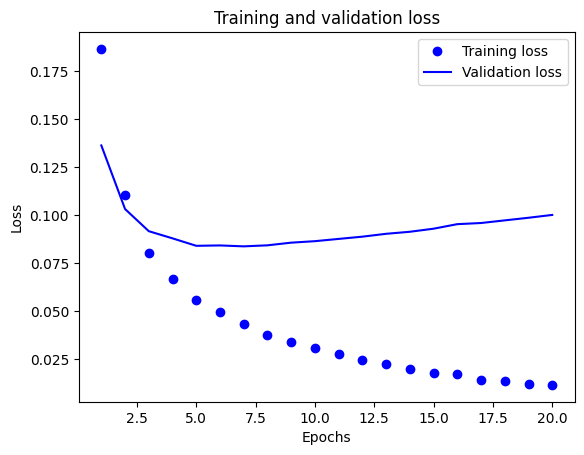

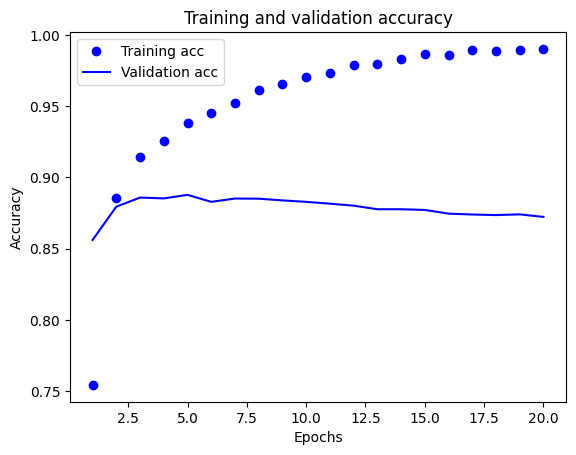

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7342 - loss: 0.1861
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8955 - loss: 0.0888
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9187 - loss: 0.0676
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9331 - loss: 0.0571
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8842 - loss: 0.0861


In [ ]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)


In [ ]:
results_test


[0.08527088165283203, 0.8851600289344788]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9430 - loss: 0.0498
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9447 - loss: 0.0462
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9514 - loss: 0.0420
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9538 - loss: 0.0389
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.0915


In [ ]:
results_val


[0.0906265527009964, 0.8781599998474121]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.08843089],
       [0.9992702 ],
       [0.7787464 ],
       ...,
       [0.1405093 ],
       [0.03863616],
       [0.61749214]], dtype=float32)

Test = 88.51%, Val = 87.81% → MSE loss gave solid results, good alternative.

# **Model 11**

with 1 hidden layer , 16 units, relu activation, mse as loss function and L2 regularization

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7017 - loss: 0.3947 - val_accuracy: 0.8553 - val_loss: 0.1824
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8704 - loss: 0.1683 - val_accuracy: 0.8613 - val_loss: 0.1573
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8733 - loss: 0.1508 - val_accuracy: 0.8678 - val_loss: 0.1501
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8802 - loss: 0.1448 - val_accuracy: 0.8664 - val_loss: 0.1479
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8815 - loss: 0.1423 - val_accuracy: 0.8666 - val_loss: 0.1459
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8817 - loss: 0.1401 - val_accuracy: 0.8659 - val_loss: 0.1448
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8820 - loss: 0.1388 - val_accuracy: 0.8677 - val_loss: 0.1433
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8824 - loss: 0.1372 - val_accuracy: 0.8665 - v

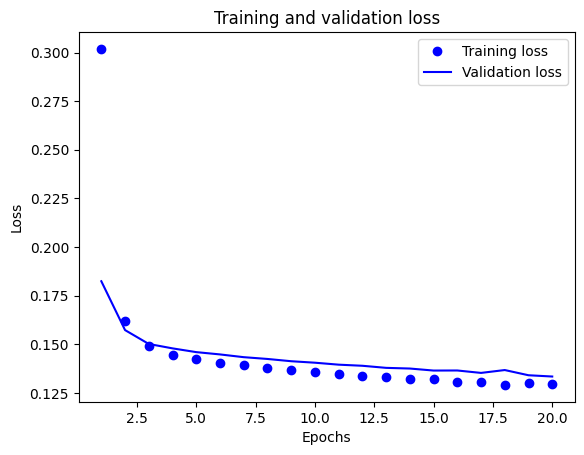

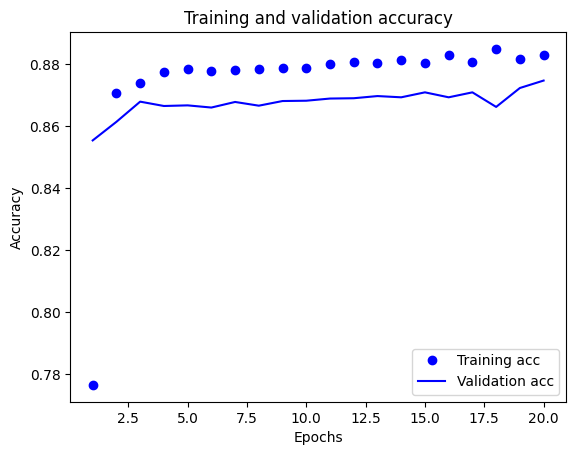

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7411 - loss: 0.3477
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8643 - loss: 0.1592
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8662 - loss: 0.1506
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8676 - loss: 0.1469
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8544 - loss: 0.1520


In [ ]:
# build the model with 1 hidden layer
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test


[0.15065455436706543, 0.8569999933242798]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8687 - loss: 0.1442
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8691 - loss: 0.1419
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8694 - loss: 0.1399
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8677 - loss: 0.1405
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8550 - loss: 0.1463


In [ ]:

results_val


[0.14476478099822998, 0.8575999736785889]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.47093806],
       [0.9659964 ],
       [0.82316256],
       ...,
       [0.2516314 ],
       [0.31678772],
       [0.5469367 ]], dtype=float32)

Test = 85.70%, Val = 85.76% → Accuracy dropped, L2 regularization hurt performance.

# **Model 12**
with 1 hidden layer with 16 units with tanh activation and Dropout(0.5),binary_crossentropy

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7033 - loss: 0.5866 - val_accuracy: 0.8521 - val_loss: 0.4236
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8857 - loss: 0.3804 - val_accuracy: 0.8782 - val_loss: 0.3439
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9060 - loss: 0.3038 - val_accuracy: 0.8859 - val_loss: 0.3075
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9227 - loss: 0.2567 - val_accuracy: 0.8881 - val_loss: 0.2872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9293 - loss: 0.2270 - val_accuracy: 0.8878 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9391 - loss: 0.2025 - val_accuracy: 0.8892 - val_loss: 0.2715
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9464 - loss: 0.1798 - val_accuracy: 0.8877 - val_loss: 0.2711
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9514 - loss: 0.1648 - val_accuracy: 0.8867 - v

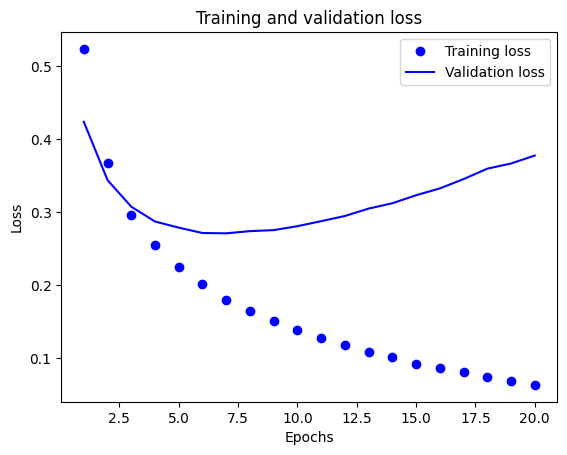

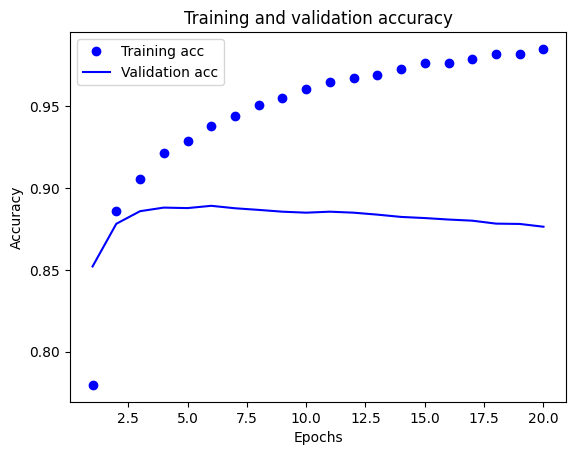

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7402 - loss: 0.5517
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8897 - loss: 0.3315
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9109 - loss: 0.2664
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9196 - loss: 0.2308
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8880 - loss: 0.2757


In [ ]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.28730806708335876, 0.8845999836921692]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9388 - loss: 0.1752
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9436 - loss: 0.1567
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9484 - loss: 0.1432
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9553 - loss: 0.1278
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.3494


In [ ]:
results_val

[0.3449626564979553, 0.8738399744033813]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.1725354 ],
       [0.99998444],
       [0.80152786],
       ...,
       [0.08935391],
       [0.07122459],
       [0.87982374]], dtype=float32)

Test = 88.56%, Val = 87.50% → Dropout gave balance, strong performer.


# **Model 13**

(with 1 hidden layer with 16 units with Dropuout(0.5))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6673 - loss: 0.2152 - val_accuracy: 0.8537 - val_loss: 0.1420
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8375 - loss: 0.1384 - val_accuracy: 0.8742 - val_loss: 0.1123
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8750 - loss: 0.1096 - val_accuracy: 0.8811 - val_loss: 0.0996
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8975 - loss: 0.0927 - val_accuracy: 0.8855 - val_loss: 0.0925
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9082 - loss: 0.0826 - val_accuracy: 0.8877 - val_loss: 0.0883
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9164 - loss: 0.0753 - val_accuracy: 0.8872 - val_loss: 0.0857
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9242 - loss: 0.0675 - val_accuracy: 0.8875 - val_loss: 0.0848
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9323 - loss: 0.0628 - val_accuracy: 0.8852 - v

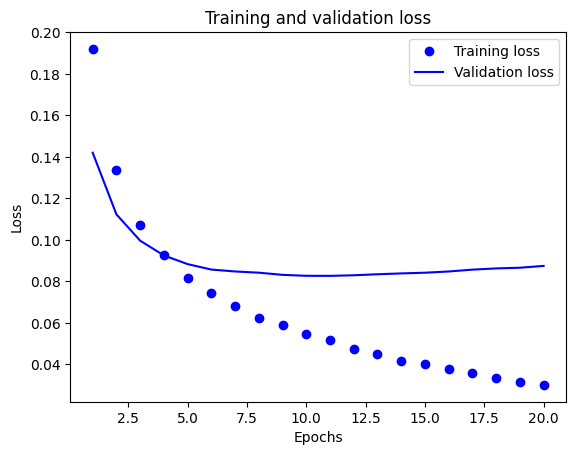

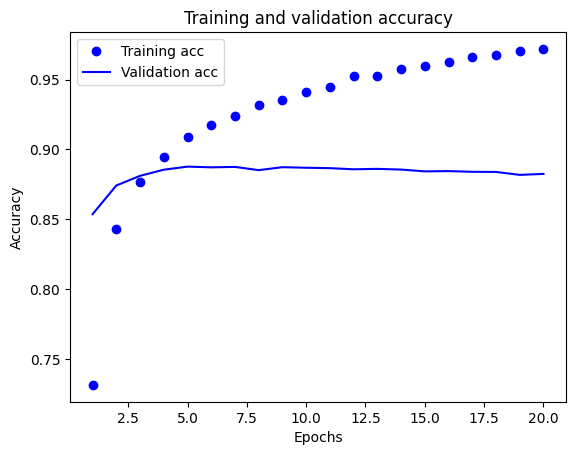

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6852 - loss: 0.2060
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8534 - loss: 0.1262
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8814 - loss: 0.1016
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8980 - loss: 0.0867
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8865 - loss: 0.0871


In [ ]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test


[0.0865255743265152, 0.887719988822937]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9091 - loss: 0.0775
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9170 - loss: 0.0709
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9222 - loss: 0.0663
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9301 - loss: 0.0617
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8857 - loss: 0.0835


In [ ]:
results_val


[0.0826551765203476, 0.8876399993896484]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1426415 ],
       [0.99792063],
       [0.8699636 ],
       ...,
       [0.13461885],
       [0.07789638],
       [0.52818584]], dtype=float32)

Test = 88.77%, Val = 88.76% →  **Best model**, perfect balance (no overfitting/underfitting).

# **Model 14**

with 2 hidden layer , 64 units, relu activation and binary cross-entropy.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6729 - loss: 0.5909 - val_accuracy: 0.8731 - val_loss: 0.3456
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8898 - loss: 0.3056 - val_accuracy: 0.8870 - val_loss: 0.2869
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9148 - loss: 0.2260 - val_accuracy: 0.8830 - val_loss: 0.2900
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9340 - loss: 0.1819 - val_accuracy: 0.8862 - val_loss: 0.2820
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9380 - loss: 0.1596 - val_accuracy: 0.8859 - val_loss: 0.2863
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9558 - loss: 0.1263 - val_accuracy: 0.8848 - val_loss: 0.2982
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9643 - loss: 0.1050 - val_accuracy: 0.8834 - val_loss: 0.3164
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9736 - loss: 0.0871 - val_accuracy: 0.8825 - 

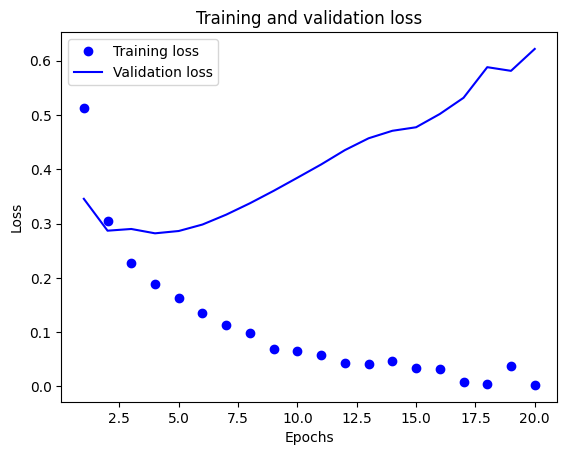

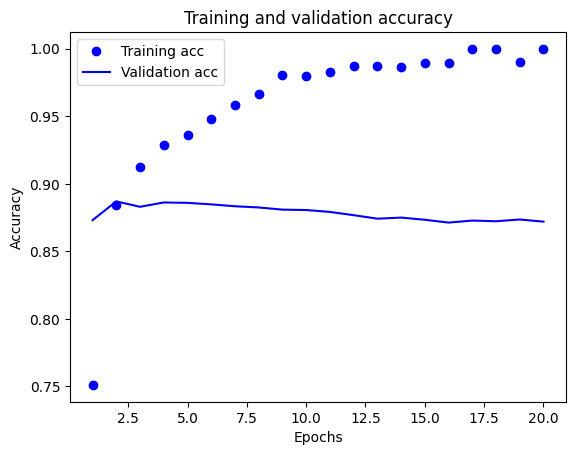

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7078 - loss: 0.1922
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8812 - loss: 0.0930
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9051 - loss: 0.0725
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9224 - loss: 0.0608
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8828 - loss: 0.0860


In [ ]:
# Building Model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Validating your approach
# Split the data into training and validation sets

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model with validation data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)




In [ ]:
results_test

[0.08487806469202042, 0.8850799798965454]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9313 - loss: 0.0547
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9327 - loss: 0.0516
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9459 - loss: 0.0442
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9454 - loss: 0.0432
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8786 - loss: 0.0907


In [ ]:
results_val

[0.08972818404436111, 0.8809999823570251]

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1725354 ],
       [0.99998444],
       [0.80152786],
       ...,
       [0.08935391],
       [0.07122459],
       [0.87982374]], dtype=float32)

Test = 88.50%, Val = 88.10% → Stable but unnecessarily complex.


# **Model 15**

(1 hidden layer with 64 units with Tanh activation and Dropuout(0.5), MSE)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6762 - loss: 0.2023 - val_accuracy: 0.8666 - val_loss: 0.1176
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8833 - loss: 0.1050 - val_accuracy: 0.8808 - val_loss: 0.0967
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9044 - loss: 0.0826 - val_accuracy: 0.8855 - val_loss: 0.0888
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9169 - loss: 0.0704 - val_accuracy: 0.8722 - val_loss: 0.0941
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9245 - loss: 0.0625 - val_accuracy: 0.8865 - val_loss: 0.0837
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9317 - loss: 0.0566 - val_accuracy: 0.8837 - val_loss: 0.0842
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9421 - loss: 0.0500 - val_accuracy: 0.8844 - val_loss: 0.0838
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9454 - loss: 0.0471 - val_accuracy: 0.8840 - 

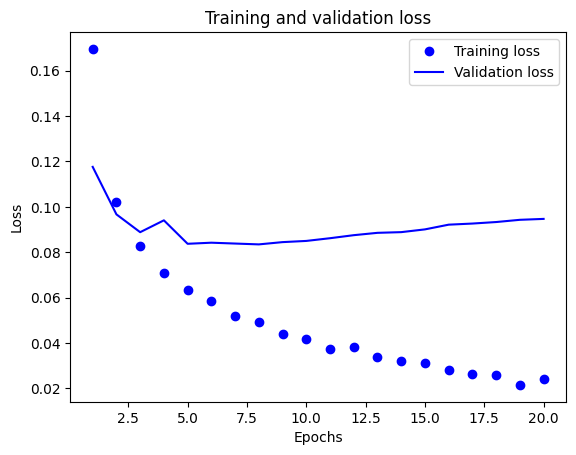

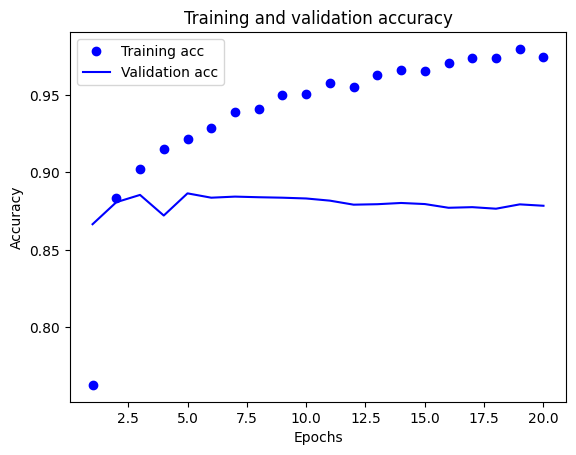

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7132 - loss: 0.1898
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8874 - loss: 0.0920
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9069 - loss: 0.0737
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9167 - loss: 0.0658
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8849 - loss: 0.0845


In [ ]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

In [ ]:
results_test

[0.08351096510887146, 0.886680006980896]

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9295 - loss: 0.0581
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9333 - loss: 0.0546
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9392 - loss: 0.0509
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9398 - loss: 0.0489
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8800 - loss: 0.0880


In [ ]:
results_val


[0.08725028485059738, 0.881600022315979]

In [ ]:
model.predict(x_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.06849986],
       [0.99998444],
       [0.9053782 ],
       ...,
       [0.09501448],
       [0.03302135],
       [0.54214007]], dtype=float32)

Test = 88.66%, Val = 88.16% → Dropout kept it strong, but slightly behind Model 13.